# Data Analysis
This notebook covers data analysis for the Flickr 8k Dataset consisting of 8,000 images that are each paired with 
five different captions which provide clear descriptions of the salient entities and events.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import nltk

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from tensorflow.keras.preprocessing.image import load_img
from collections import Counter


In [50]:
# Read the captions into a dataframe
captions_df = pd.read_csv("captions.txt")

In [51]:
captions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    40455 non-null  object
 1   caption  40455 non-null  object
dtypes: object(2)
memory usage: 632.2+ KB


# Sample Images and their corresponding captions

/var/folders/jk/jz9dnwjj61l63b5kvjl3s8cw0000gn/T/ipykernel_21877/1592593161.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Add this line for better spacing between subplots


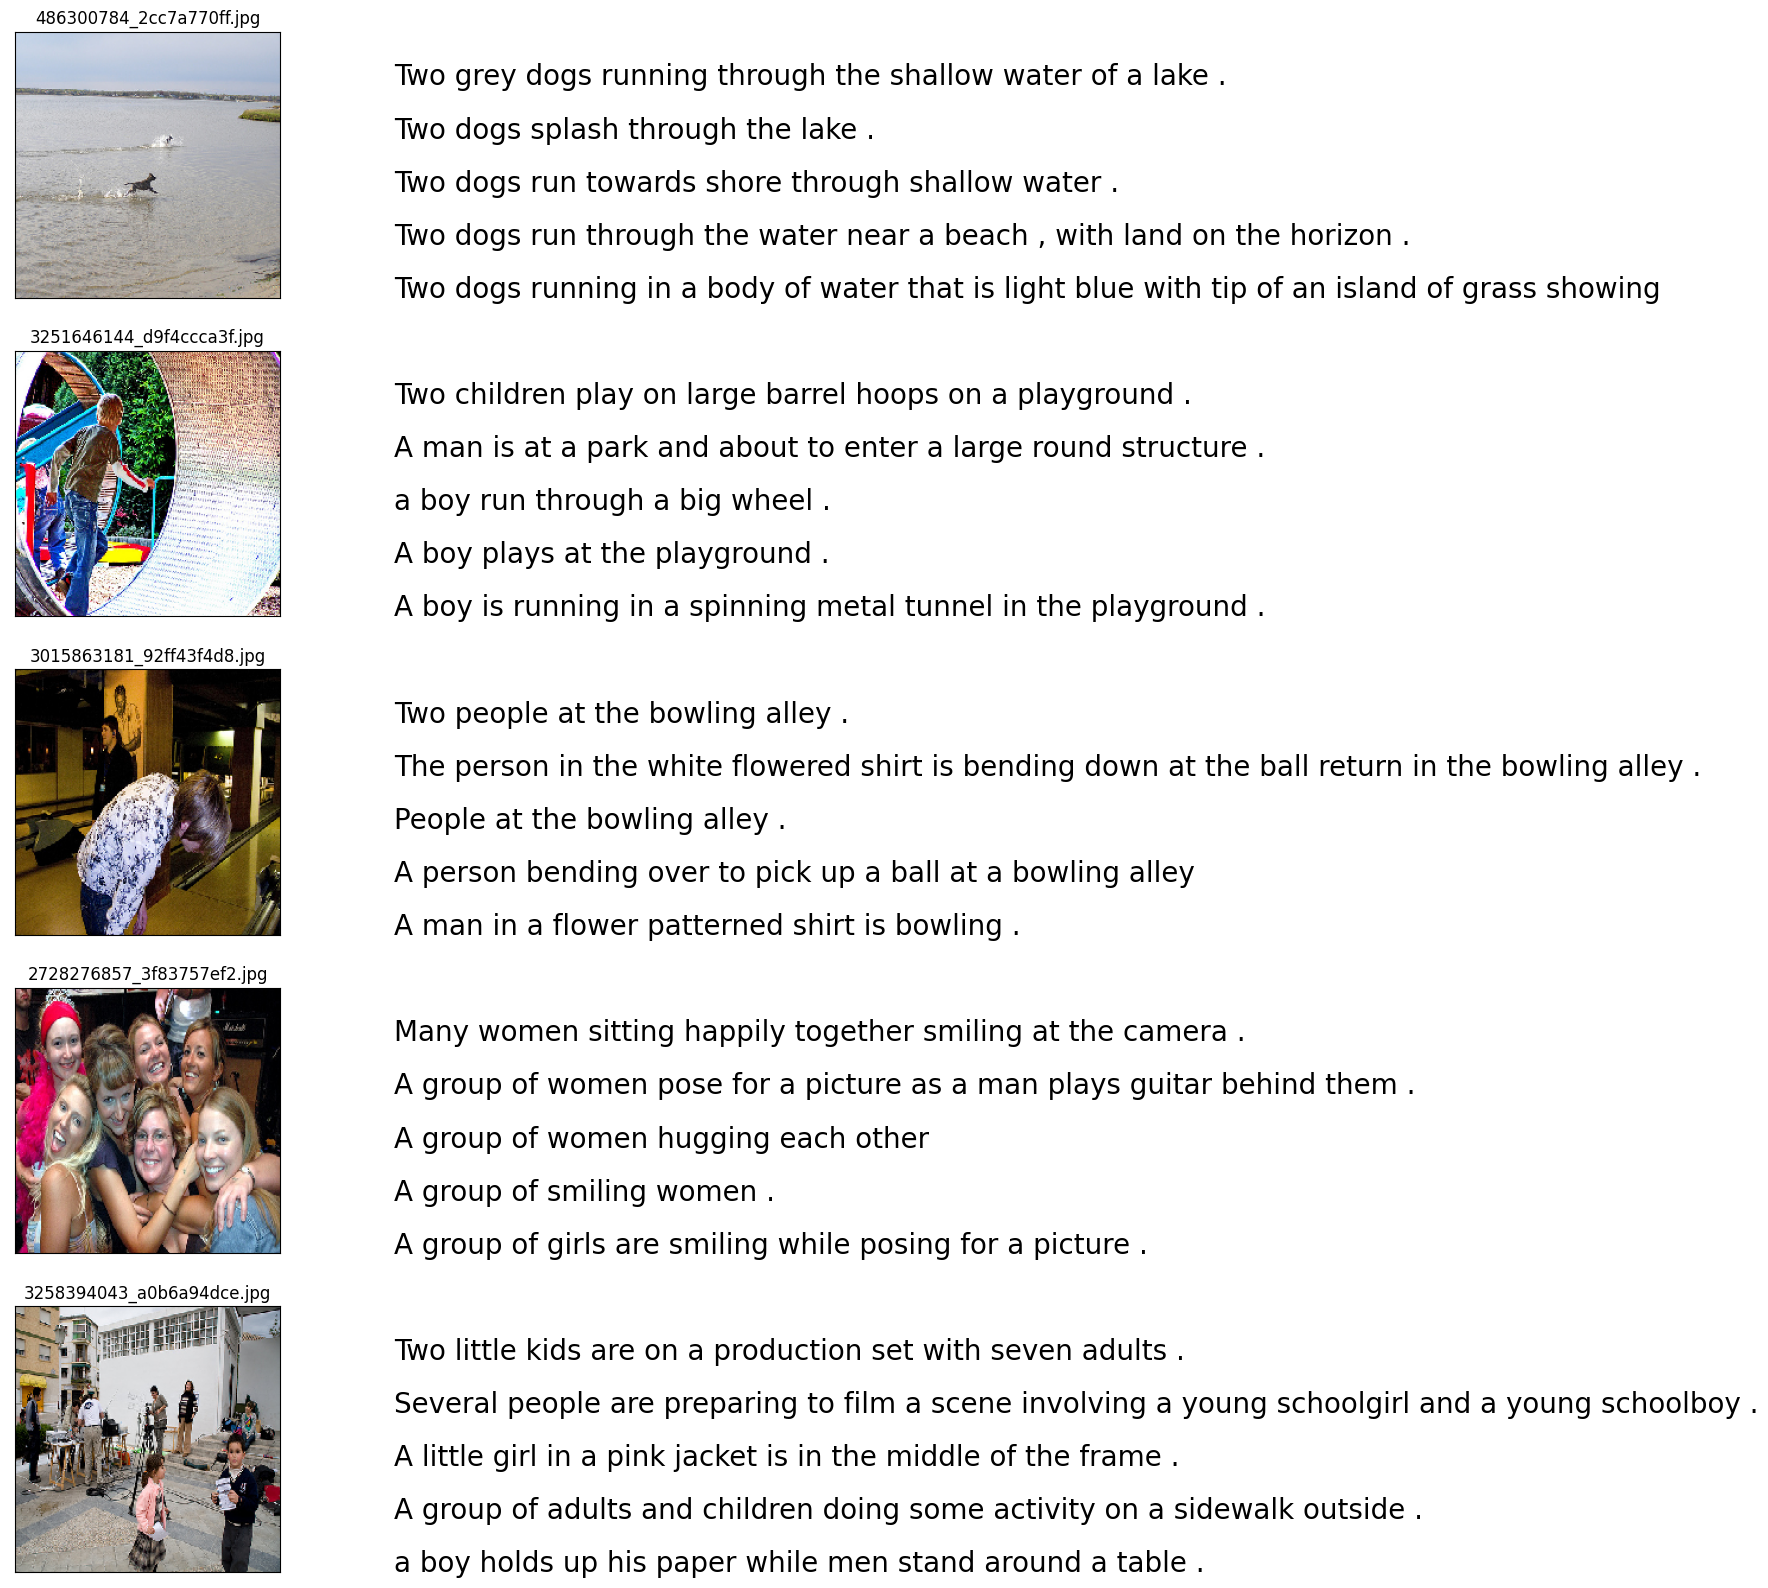

In [52]:
# Randomly selects `num_pics` amount of pictures, showcasing their captions
num_pics = 5
num_pixels = 224
target_size = (num_pixels, num_pixels, 3)
count = 1

fig = plt.figure(figsize=(10,20))

# Create a list of all the files, and randomly choose `num_pics` amount
all_files = captions_df['image'].tolist()
random_files = random.sample(all_files, num_pics)
for file in random_files:
    filename = os.path.join(os.getcwd(),"Images",file)
    captions = list(captions_df["caption"].loc[captions_df["image"] == file].values)
    image_load = load_img(filename, target_size=target_size)
    
    ax = fig.add_subplot(num_pics, 2, count, xticks=[], yticks=[])
    ax.imshow(image_load)
    ax.set_title(file)  # Add the file name as the title
    count += 1
    
    ax = fig.add_subplot(num_pics, 2, count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, len(captions))

    for i, caption in enumerate(captions):
        ax.text(0, i, caption, fontsize=20)
    count += 1

plt.tight_layout()  # Add this line for better spacing between subplots
plt.show()

# Word Frequency

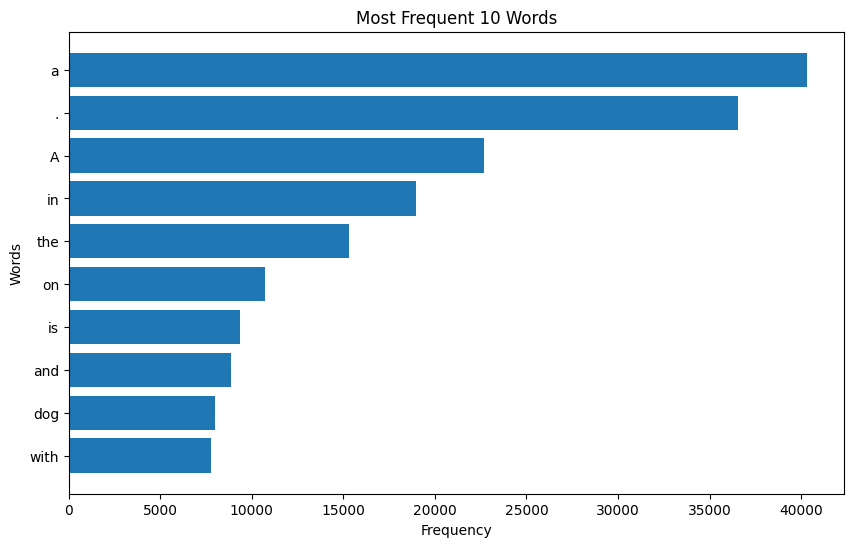

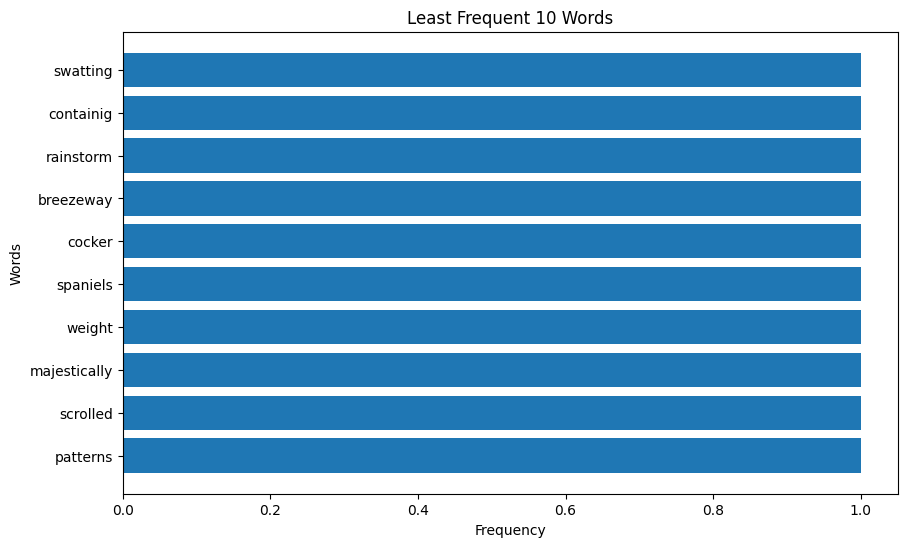

In [53]:
# Combine all captions into a single string
all_captions = ' '.join(captions_df['caption'])

# Split the captions into individual words
words = all_captions.split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the most frequent 10 words
most_common_words = word_counts.most_common(10)
most_common_words.reverse()  # Reverse the order for plotting

# Get the least frequent 10 words
least_common_words = word_counts.most_common()[:-11:-1]

# Extract the words and their frequencies
most_common_words, most_common_counts = zip(*most_common_words)
least_common_words, least_common_counts = zip(*least_common_words)

# Create bar graph for most frequent words
plt.figure(figsize=(10, 6))
plt.barh(range(len(most_common_words)), most_common_counts, align='center')
plt.yticks(range(len(most_common_words)), most_common_words)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Frequent 10 Words')
plt.show()

# Create bar graph for least frequent words
plt.figure(figsize=(10, 6))
plt.barh(range(len(least_common_words)), least_common_counts, align='center')
plt.yticks(range(len(least_common_words)), least_common_words)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Least Frequent 10 Words')
plt.show()

# Caption Length

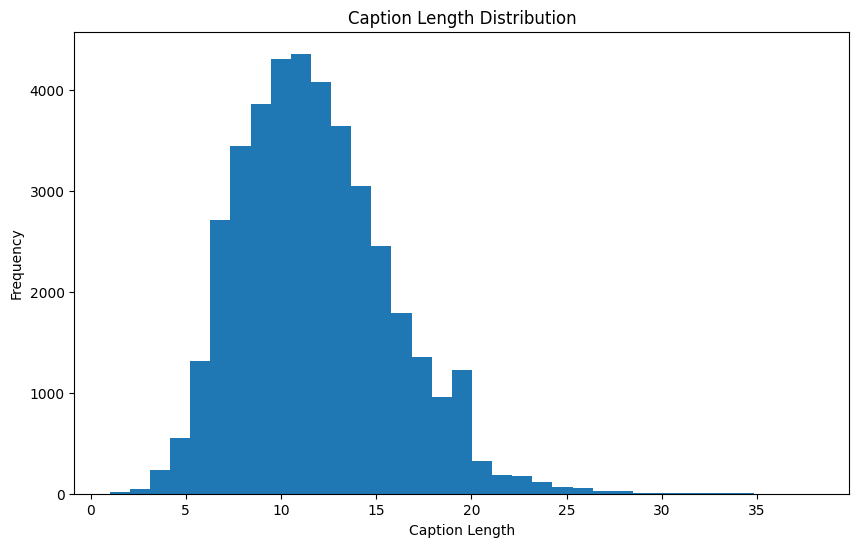

In [54]:
# Compute the length of each caption
caption_lengths = captions_df['caption'].str.split().apply(len)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(caption_lengths, bins=35)
plt.xlabel('Caption Length')
plt.ylabel('Frequency')
plt.title('Caption Length Distribution')
plt.show()  

# POS Tagging
Part-of-speech (POS) tagging is a natural language processing technique that involves assigning grammatical tags to words in a given text based on their syntactic role and context.

In [55]:
# Tag each caption
captions_df['pos_tags'] = captions_df['caption'].apply(lambda x: pos_tag(word_tokenize(x)))
captions_df.head()

,image,caption,pos_tags
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,"[(A, DT), (child, NN), (in, IN), (a, DT), (pin..."
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,"[(A, DT), (girl, NN), (going, VBG), (into, IN)..."
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,"[(A, DT), (little, JJ), (girl, NN), (climbing,..."
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,"[(A, DT), (little, JJ), (girl, NN), (climbing,..."
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,"[(A, DT), (little, JJ), (girl, NN), (in, IN), ..."


<Figure size 1200x600 with 0 Axes>

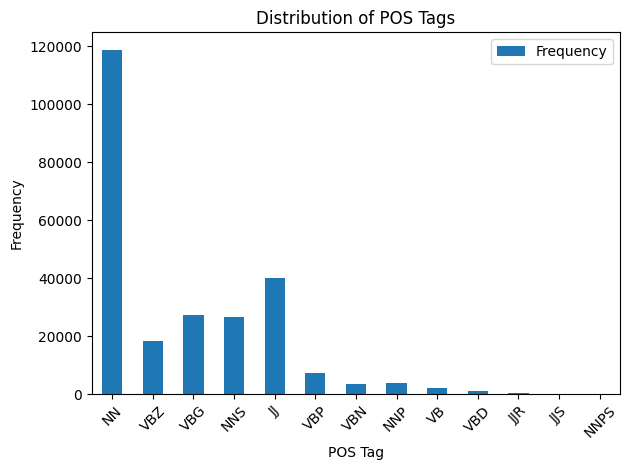

NN: Noun, singular or mass
VBZ: Verb, 3rd person singular present
VBG: Verb, gerund or present participle
NNS: Noun, plural
JJ: Adjective
VBP: Verb, non-3rd person singular present
VBN: Verb, past participle
NNP: nan
VB: Verb, base form
VBD: Verb, past tense
JJR: Adjective, comparative
JJS: Adjective, superlative
NNPS: nan


In [56]:
# Flatten the list of POS tags
pos_tags_flat = [tag for tags in captions_df['pos_tags'] for _, tag in tags]

# Define the POS tags to include in the graph
desired_pos_tags = ['NN', 'NNS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'JJS']

# Filter POS tags based on desired categories
filtered_pos_tags = [tag for tag in pos_tags_flat if any(tag.startswith(pos) for pos in desired_pos_tags)]

# Count the frequency of each POS tag
pos_counts = nltk.FreqDist(filtered_pos_tags)

# POS tag descriptions
pos_descriptions = {
    'NN': 'Noun, singular or mass',
    'NNS': 'Noun, plural',
    'VB': 'Verb, base form',
    'VBD': 'Verb, past tense',
    'VBG': 'Verb, gerund or present participle',
    'VBN': 'Verb, past participle',
    'VBP': 'Verb, non-3rd person singular present',
    'VBZ': 'Verb, 3rd person singular present',
    'JJ': 'Adjective',
    'JJR': 'Adjective, comparative',
    'JJS': 'Adjective, superlative'
}

# Convert FreqDist to a DataFrame
pos_df = pd.DataFrame(list(pos_counts.items()), columns=['POS Tag', 'Frequency'])

# Add descriptions column
pos_df['Description'] = pos_df['POS Tag'].map(pos_descriptions)

# Create a wider figure for the bar chart
plt.figure(figsize=(12, 6))

# Create a bar chart of POS tag distribution
pos_df.plot.bar(x='POS Tag', y='Frequency')
plt.title('Distribution of POS Tags')
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Adjust spacing to make x-axis labels visible
plt.tight_layout()

plt.show()

# Print POS tag descriptions below the graph
for _, row in pos_df.iterrows():
    print(f"{row['POS Tag']}: {row['Description']}")